# Jonathan Halverson
# Tuesday, December 19, 2017
# Simple RNN for time series

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

Temperature data and logistic regression, create RNN from base API commands

In [2]:
n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

In [3]:
import numpy as np
import tensorflow as tf

In [4]:
X = tf.placeholder(dtype=tf.float32, shape=(None, n_steps, n_inputs))
y = tf.placeholder(dtype=tf.float32, shape=(None, n_steps, n_outputs))

In [5]:
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
cell = tf.contrib.rnn.OutputProjectionWrapper(basic_cell, output_size=n_outputs)
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [6]:
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
training_op = optimizer.minimize(loss)

In [7]:
init = tf.global_variables_initializer()

In [8]:
t = np.linspace(0, 30, num=300)
f = t * np.sin(t) / 3.0 + 2.0 * np.sin(5.0 * t)

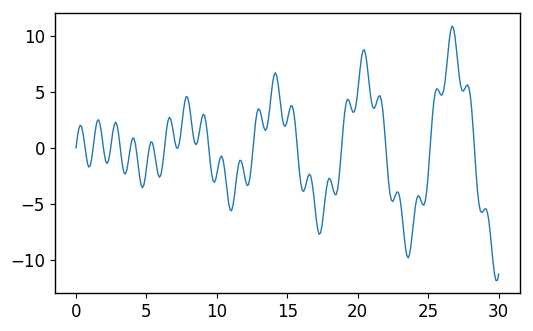

In [9]:
plt.plot(t, f)

In [10]:
def fetch_batch(batch_size):
     a_batch = []
     b_batch = []
     for _ in range(batch_size):
          rnd_index = np.random.choice(np.arange(1, 280))
          a_batch.append(f[rnd_index - 1: rnd_index + n_steps - 1].reshape(-1, 1))
          b_batch.append(f[rnd_index: rnd_index + n_steps].reshape(-1, 1))
     return np.asarray(a_batch), np.asarray(b_batch)

In [11]:
n_iterations = 1500
with tf.Session() as sess:
     init.run()
     for iteration in range(n_iterations):
          X_batch, y_batch = fetch_batch(batch_size=50)
          sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
          if iteration % 100 == 0:
               mse = loss.eval(feed_dict={X:X_batch, y:y_batch})
               print(iteration, "  MSE:", mse)
     X_new = np.random.randn(n_steps).reshape(1, n_steps, 1)
     X_new = f[100:100 + n_steps].reshape(1, n_steps, 1)
     y_pred = sess.run(outputs, feed_dict={X:X_new})

(0, '  MSE:', 18.681789)
(100, '  MSE:', 0.69239771)
(200, '  MSE:', 0.28214553)
(300, '  MSE:', 0.13617638)
(400, '  MSE:', 0.079642728)
(500, '  MSE:', 0.065795332)
(600, '  MSE:', 0.054252733)
(700, '  MSE:', 0.053183615)
(800, '  MSE:', 0.053007379)
(900, '  MSE:', 0.042365585)
(1000, '  MSE:', 0.047256142)
(1100, '  MSE:', 0.0538674)
(1200, '  MSE:', 0.040394366)
(1300, '  MSE:', 0.037676219)
(1400, '  MSE:', 0.045326047)


In [12]:
print outputs.shape, states.shape

(?, 20, 1) (?, 100)


In [13]:
y_pred.shape

(1, 20, 1)

In [14]:
X_new = np.squeeze(X_new)
y_pred = np.squeeze(y_pred)

In [15]:
X_new[1:]

array([-1.41416618, -0.89629281, -0.74584591, -1.05842873, -1.81000134,
       -2.86214191, -3.99555018, -4.96354411, -5.55237281, -5.6334887 ,
       -5.19490229, -4.34389763, -3.28044301, -2.24785278, -1.47286144,
       -1.10987925, -1.20316719, -1.67625215, -2.35118883])

In [16]:
np.arange(n_steps)[1:]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

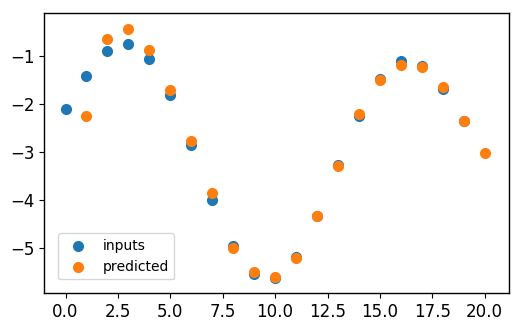

In [17]:
plt.scatter(np.arange(n_steps), X_new, label='inputs')
#plt.scatter(np.arange(n_steps)[1:], X_new[1:], label='target')
plt.scatter(np.arange(n_steps) + 1, y_pred, label='predicted')
plt.legend()

In [18]:
x, y = fetch_batch(batch_size=50)

In [19]:
x.shape

(50, 20, 1)

In [20]:
np.c_[x[0], y[0]]

array([[-3.77183494, -3.03334044],
       [-3.03334044, -2.72012651],
       [-2.72012651, -2.83172562],
       [-2.83172562, -3.25096599],
       [-3.25096599, -3.77363121],
       [-3.77363121, -4.1596954 ],
       [-4.1596954 , -4.19349932],
       [-4.19349932, -3.73802839],
       [-3.73802839, -2.76990566],
       [-2.76990566, -1.38646433],
       [-1.38646433,  0.21685566],
       [ 0.21685566,  1.79323025],
       [ 1.79323025,  3.10379296],
       [ 3.10379296,  3.97498631],
       [ 3.97498631,  4.33980459],
       [ 4.33980459,  4.25277981],
       [ 4.25277981,  3.87503329],
       [ 3.87503329,  3.43309267],
       [ 3.43309267,  3.16163907],
       [ 3.16163907,  3.24430889]])

# Below we work with real temperature data

The records consists of the mean temperature in Boston for each week over a 30-week period (n_steps). The target is the mean temperature the week after the window or the 31st week. Our training data are intervals taken over a 5 year period or 261 weeks.

In [21]:
import pandas as pd

In [22]:
bos_wthr = pd.read_csv('../project_boston_restaurants/data/boston_weather_2015_2011.csv', parse_dates=['EST'])
bos_wthr['weekofyear'] = bos_wthr['EST'].apply(lambda x: x.weekofyear)
bos_wthr.head(3).transpose()

,0,1,2
EST,2015-01-01 00:00:00,2015-01-02 00:00:00,2015-01-03 00:00:00
Max TemperatureF,33,41,37
Mean TemperatureF,28,36,30
Min TemperatureF,22,31,22
Max Dew PointF,16,17,36
MeanDew PointF,8,15,20
Min DewpointF,5,11,8
Max Humidity,53,53,100
Mean Humidity,43,45,72
Min Humidity,32,37,43


In [23]:
bos_wthr

,EST,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees,weekofyear
0,2015-01-01,33,28,22,16,8,5,53,43,32,...,10,10,23,14,29.0,0.00,3,NaN,230,1
1,2015-01-02,41,36,31,17,15,11,53,45,37,...,10,10,26,13,32.0,0.00,3,NaN,260,1
2,2015-01-03,37,30,22,36,20,8,100,72,43,...,6,1,22,10,25.0,0.62,7,Rain-Snow,81,1
3,2015-01-04,52,44,35,50,41,34,100,95,89,...,4,0,17,8,26.0,0.57,8,Fog-Rain,260,1
4,2015-01-05,50,34,17,39,13,-6,65,47,29,...,10,10,37,22,49.0,0.00,2,NaN,280,2
5,2015-01-06,18,17,15,11,5,-5,80,59,37,...,7,1,22,9,28.0,0.02,6,Snow,262,2
6,2015-01-07,26,15,4,12,3,-13,88,58,28,...,9,2,31,16,40.0,T,3,Snow,272,2
7,2015-01-08,19,9,-1,7,-8,-18,56,49,41,...,10,10,25,14,32.0,0.00,1,NaN,259,2
8,2015-01-09,30,25,19,22,14,8,88,65,42,...,8,1,25,14,35.0,0.01,4,Snow,240,2
9,2015-01-10,24,21,17,8,3,-2,62,49,35,...,10,10,20,12,23.0,0.00,1,NaN,263,2


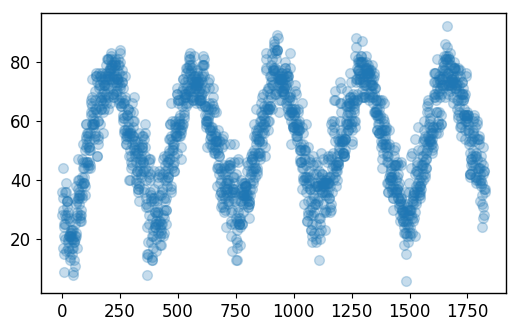

In [24]:
plt.scatter(bos_wthr.index, bos_wthr['Mean TemperatureF'], alpha=0.25)

Let's create a simple ML regression model to predict temperature the next week based on the mean temperature the previous n weeks.

#### Aside on applying the FFT to the temperature data

In [25]:
t = np.arange(bos_wthr.index.size)
syn = 45.0 * (np.sin(t/65.0) + 1.0)

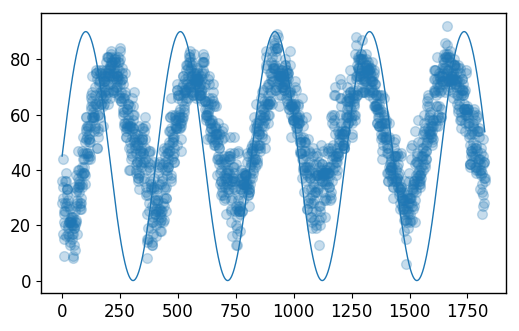

In [26]:
plt.scatter(bos_wthr.index, bos_wthr['Mean TemperatureF'], alpha=0.25)
plt.plot(t, syn)

#### Frequency spectrum

In [61]:
bos_wthr.shape[0]

1826

In [62]:
bos_wthr.index.max()

1825

In [91]:
T = 1.0 * bos_wthr.index.max()
N = bos_wthr.shape[0] / 2 # half the total number of points
dx = pd.DataFrame({'k':range(0, 2 * N)})
dx['w'] = 2.0 * np.pi * dx.k / T
dx['t_k'] = dx.k * T / (2.0 * N)
dx['Temperature'] = 1.0 * bos_wthr['Mean TemperatureF'].copy()

In [92]:
dx

,k,w,t_k,Temperature
0,0,0.000000,0.000000,28.0
1,1,0.003443,0.999452,36.0
2,2,0.006886,1.998905,30.0
3,3,0.010329,2.998357,44.0
4,4,0.013771,3.997809,34.0
5,5,0.017214,4.997262,17.0
6,6,0.020657,5.996714,15.0
7,7,0.024100,6.996166,9.0
8,8,0.027543,7.995619,25.0
9,9,0.030986,8.995071,21.0


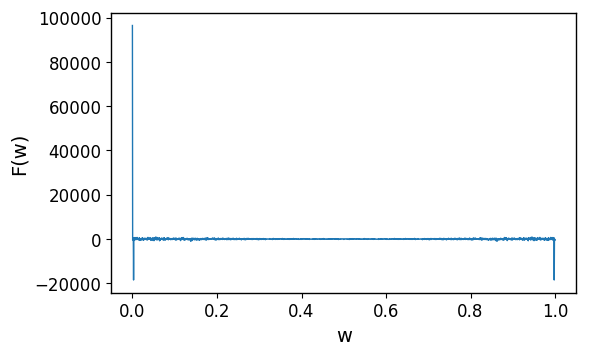

In [93]:
plt.plot(dx.w / (2 * np.pi), np.fft.fft(dx.Temperature).real)
#plt.xlim(80, 100)
plt.xlabel('w')
plt.ylabel('F(w)')

In [94]:
w = 0.0025
1/w/6.28, 365/4.0

(63.69426751592356, 91.25)

In [120]:
1/91.25

0.010958904109589041

In [122]:
1/w,6.28/w,1/w/6.28

(400.0, 2512.0, 63.69426751592356)

(0, 100)

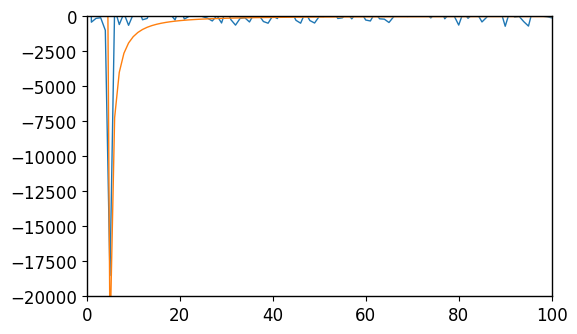

In [95]:
plt.plot(np.fft.fft(bos_wthr['Mean TemperatureF']).real)
plt.plot(np.fft.fft(syn).real)
plt.ylim(-20000, 0)
plt.xlim(0, 100)

In [113]:
N = dx.Temperature.index.max()
Xk = []
for k in range(0, N + 1):
     summ = 0.0 + 0.0j
     for n in range(0, N + 1):
          summ += bos_wthr['Mean TemperatureF'][n] * np.exp(-1j * 2.0 * np.pi * k * n / float(N + 1))
     Xk.append(summ)

In [114]:
Ak = np.fft.fft(bos_wthr['Mean TemperatureF'])
np.allclose(Xk, Ak)

True

In [135]:
Ak.real

array([ 96444.        ,   -417.71113508,   -145.13264544, ...,
         -100.53121032,   -145.13264544,   -417.71113508])

In [134]:
np.abs(Ak)

array([ 96444.        ,    719.33336   ,    475.0062396 , ...,
          532.54252986,    475.0062396 ,    719.33336   ])

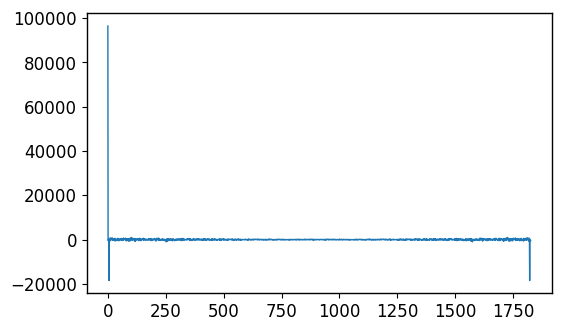

In [119]:
plt.plot([u.real for u in Xk])

In [ ]:
Fw = []
for w in df.w:
     sumt = 0.0 + 0.0j
     for k in df.k:
          t_k = k * T / (2 * N)
          sumt += F(t_k) * np.exp(1j * w * t_k)
     Fw.append(sumt / 2.0 / N)

Compute the mean temperature for each week over the five year period:

In [28]:
bos_wthr['week'] = bos_wthr.index / 7
T_week = bos_wthr.groupby('week')['Mean TemperatureF'].mean()

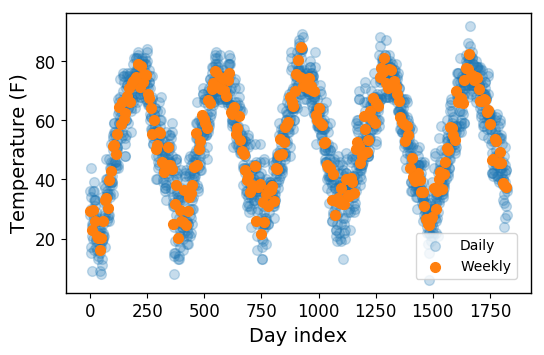

In [131]:
plt.scatter(bos_wthr.index, bos_wthr['Mean TemperatureF'], alpha=0.25, label='Daily')
plt.scatter(T_week.index * 7, T_week.values, label='Weekly')
plt.xlabel('Day index')
plt.ylabel('Temperature (F)')
plt.legend()

In [32]:
n_steps = 30
def get_features_and_target(batch_size):
     n = T_week.size
     arr = []
     for _ in xrange(batch_size):
          rand_idx = np.random.choice(np.arange(0, n - n_steps - 1))
          arr.append(T_week[rand_idx:rand_idx + n_steps + 1]) # last value is the target
     return np.array(arr)

In [33]:
train = get_features_and_target(batch_size=35)
test = get_features_and_target(batch_size=20)

In [34]:
col_names = ['week_' + str(i) for i in range(n_steps)] + ['target']
df_train = pd.DataFrame(train, columns=col_names)
df_test = pd.DataFrame(test, columns=col_names)

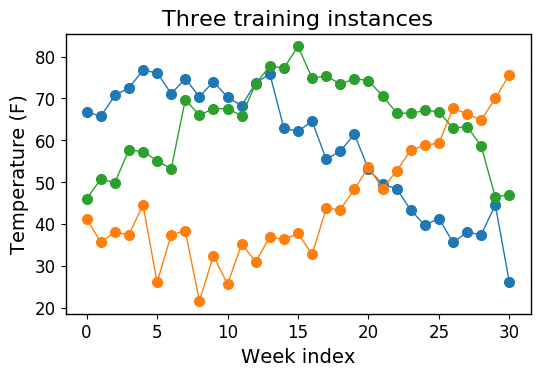

In [133]:
plt.plot(df_train.iloc[0].values, marker='o')
plt.plot(df_train.iloc[1].values, marker='o')
plt.plot(df_train.iloc[2].values, marker='o')
plt.xlabel('Week index')
plt.ylabel('Temperature (F)')
plt.title('Three training instances')

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linreg = LinearRegression()
linreg = linreg.fit(df_train.iloc[:,:-1], df_train.target)
print "rmse =", np.sqrt(mean_squared_error(df_test.target, linreg.predict(df_test.iloc[:,:-1])))
print "R2 =", r2_score(df_test.target, linreg.predict(df_test.iloc[:,:-1]))

rmse = 13.8673007756
R2 = 0.359779786926


In [124]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=20)
rf = rf.fit(df_train.iloc[:,:-1], df_train.target)
print "rmse =", np.sqrt(mean_squared_error(df_test.target, rf.predict(df_test.iloc[:,:-1])))
print "R2 =", r2_score(df_test.target, rf.predict(df_test.iloc[:,:-1]))

rmse = 4.7913154855
R2 = 0.92357155087
